In [1]:
#What percent of drivers in this dataset were at fault?

In [57]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
#Reading in all of the crash data
all_crash_data = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv", low_memory=False)
all_crash_data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,MCP1307000K,190024786,Montgomery County Police,Property Damage Crash,05/24/2019 05:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT,...,0,No,No,0,UNK,UNK,NaN,39.199047,-77.250743,"(39.19904667, -77.25074333)"
2,MCP2846008X,230034260,Montgomery County Police,Property Damage Crash,07/17/2023 10:45:00 AM,County,SELFRIDGE RD,County,RANDOLPH RD,NaN,...,35,No,No,2003,FORD,TK,NO MISUSE,39.054588,-77.085974,"(39.05458848, -77.08597423)"
3,MCP32610017,230034668,Montgomery County Police,Property Damage Crash,07/20/2023 11:40:00 PM,Maryland (State),MUNCASTER MILL RD,County,SHADY GROVE RD,NaN,...,45,No,No,2023,TOYT,CP,NO MISUSE,39.148721,-77.147111,"(39.14872076, -77.14711061)"
4,EJ78520081,230033429,Gaithersburg Police Depar,Property Damage Crash,07/13/2023 05:40:00 PM,Municipality,PERRY PKWY,Unknown,ENT TO SHOPPING CENTER,NaN,...,25,No,No,2001,KENWORTH,TRUCK,NaN,39.149085,-77.210731,"(39.14908542, -77.21073135)"


In [149]:
#Creating DataFrame for Drivers At Fault 
fault_data = pd.DataFrame({
    'Person ID': all_crash_data['Person ID'],
    'Driver At Fault': all_crash_data['Driver At Fault']
})

fault_data.head()

,Person ID,Driver At Fault
0,DE2A24CD-7919-4F8D-BABF-5B75CE12D21E,Yes
1,6208FA7B-5DC4-4B54-AD60-0C06DFE2AE81,Yes
2,9ACC5A7E-47A1-438F-BF0E-40B0A8632055,Yes
3,E611A3F8-5F7D-465B-8DE0-3814027998F1,No
4,3C7F6951-1701-44DC-9824-88DF4E32352E,Yes


In [150]:
#Get total count 
fault_data.count()

Person ID          168157
Driver At Fault    168157
dtype: int64

In [151]:
#Determination of fault - yes, no, unknown 

Fault = fault_data["Driver At Fault"].unique()
Fault

array(['Yes', 'No', 'Unknown'], dtype=object)

In [156]:
#Determining the total count of Drivers for each "Fault" status. 

drivers = fault_data["Driver At Fault"].value_counts()
drivers

Driver At Fault
Yes        90334
No         73285
Unknown     4538
Name: count, dtype: int64

In [157]:
#Naming x-axis and y-axis variables 

Fault = ["Yes", "No", "Unknown"]
Drivers = [90334, 73285, 4538]

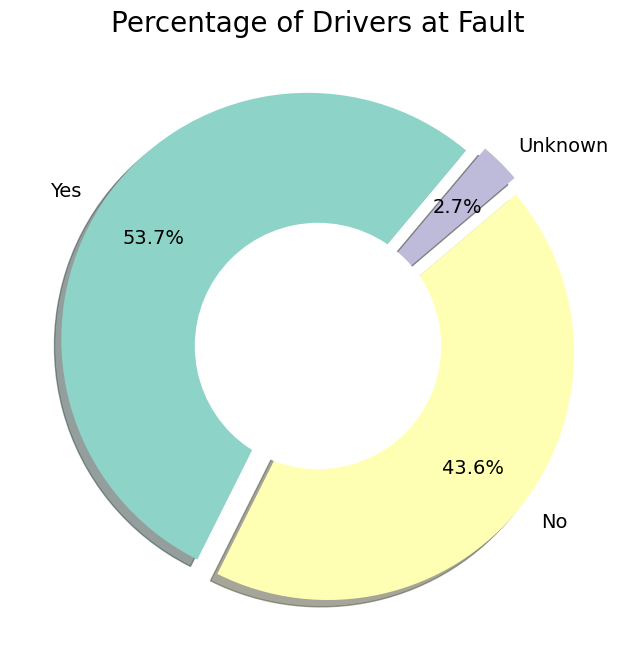

In [159]:
#Creating pie chart 

#Increase pie chart size 
plt.figure(figsize=(8,8))

#Create title for pie chart
plt.title(
    label="Percentage of Drivers at Fault",
    fontdict={"fontsize":20},
    pad=5
)

#Pie chart style - labels, font style, size, etc
plt.pie(
    Drivers,
    labels=Fault, 
    
    #Using default colors from existing palette
    colors=sns.color_palette('Set3'),
    
    #Altering chart angle so labels do not intersect title
    startangle=50,
    
    #Show percentage with 1 decimal point
    autopct="%1.1f%%", 
    
    #Move percentage inside the arc
    pctdistance=0.75,
    
    #Add shadow to pie chart
    shadow=True, 
   
    #Increase font size
    textprops={"fontsize":14},
   
    #Explode/Show spacing between each result
    explode=[0.05, 0.05, 0.05]
    )

#Create circular cut out in pie chart - style choice for presentation 
hole = plt.Circle((0, 0), 0.50, facecolor='white')
plt.gcf().gca().add_artist(hole)


plt.show()